In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [3]:
df = pd.read_csv('result.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1044 non-null   int64  
 1   school      1044 non-null   object 
 2   sex         1044 non-null   object 
 3   age         1044 non-null   int64  
 4   address     1044 non-null   object 
 5   famsize     1044 non-null   object 
 6   Pstatus     1044 non-null   object 
 7   Medu        1044 non-null   int64  
 8   Fedu        1044 non-null   int64  
 9   Mjob        1044 non-null   object 
 10  Fjob        1044 non-null   object 
 11  reason      1044 non-null   object 
 12  guardian    1044 non-null   object 
 13  traveltime  1044 non-null   int64  
 14  studytime   1044 non-null   int64  
 15  failures    1044 non-null   int64  
 16  schoolsup   1044 non-null   object 
 17  famsup      1044 non-null   object 
 18  paid        1044 non-null   object 
 19  activities  1044 non-null  

In [16]:
ses_df = pd.DataFrame(df[['sex', 'address', 'famsize' , 'Pstatus','Medu','Fedu','Mjob','Fjob',
                    'guardian','famsup','schoolsup', 'internet','paid','higher','Final_G']])

In [17]:
ses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        1044 non-null   object 
 1   address    1044 non-null   object 
 2   famsize    1044 non-null   object 
 3   Pstatus    1044 non-null   object 
 4   Medu       1044 non-null   int64  
 5   Fedu       1044 non-null   int64  
 6   Mjob       1044 non-null   object 
 7   Fjob       1044 non-null   object 
 8   guardian   1044 non-null   object 
 9   famsup     1044 non-null   object 
 10  schoolsup  1044 non-null   object 
 11  internet   1044 non-null   object 
 12  paid       1044 non-null   object 
 13  higher     1044 non-null   object 
 14  Final_G    1044 non-null   float64
dtypes: float64(1), int64(2), object(12)
memory usage: 122.5+ KB


In [10]:
X = ses_df.copy()
y = X.pop("Final_G")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes
discrete_features = X.dtypes == int

In [11]:
# A look at a few features with their MI scores
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::]

Medu         0.044589
famsup       0.018046
higher       0.013477
sex          0.008485
Fjob         0.007125
schoolsup    0.005176
Fedu         0.003406
Mjob         0.001973
guardian     0.001395
Pstatus      0.000321
address      0.000000
famsize      0.000000
internet     0.000000
paid         0.000000
Name: MI Scores, dtype: float64

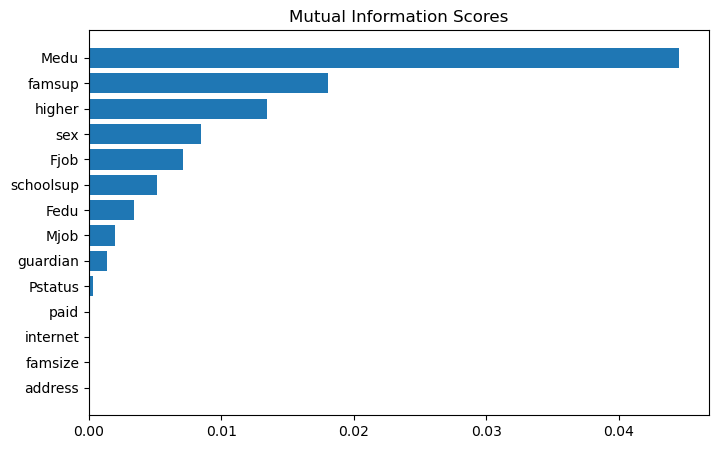

In [12]:
# Bar chat for a somewhat easier comparision
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# Correlation Matrix

In [27]:
z = pd.concat([X,y], axis=1)
z.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,schoolsup,internet,paid,higher,Final_G
0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,6.0
1,0,0,0,1,1,1,0,1,1,1,1,1,0,0,5.0
2,0,0,1,1,1,1,0,1,0,0,0,1,1,0,8.0
3,0,0,0,1,4,2,1,2,0,1,1,1,1,0,15.0
4,0,0,0,1,3,3,2,1,1,1,1,0,1,0,9.0


In [26]:
# calculate the correlation matrix
corr_matrix = z.corr()

# create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(z=corr_matrix.values,
                                 x=corr_matrix.columns,
                                 y=corr_matrix.index,
                                 colorscale='Viridis',
                                 text=corr_matrix.round(2).values))

# set the title of the chart
fig.update_layout(title='Correlation Heatmap')

# add labels to the heatmap
fig.update_layout(
    xaxis=dict(side='top'),
    yaxis=dict(title='Features'),
    annotations=[dict(
        x=x_val,
        y=y_val,
        text=str(text_val),
        font=dict(color='white'),
        showarrow=False
    )
        for y_val, y in enumerate(corr_matrix.index)
        for x_val, x in enumerate(corr_matrix.columns)
        for text_val in [corr_matrix.loc[y, x].round(2)]
        if x_val < y_val
])

# display the chart
fig.show()